# To- Do- Task
# Problem 1- Data Read, Write and Inspect :


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving bank.csv to bank.csv


Task 1: Load the dataset (bank.csv)


In [ ]:
import pandas as pd
df = pd.read_csv("bank.csv")
df.head()


,age,job,marital,education,balance,loan
0,30,admin,married,secondary,1200,no
1,45,technician,single,tertiary,3500,yes
2,29,blue-collar,married,primary,800,no
3,35,management,divorced,tertiary,2600,no
4,42,admin,married,secondary,1500,no


Task 2: Inspect the DataFrame

2(a) Columns with dtype = object

In [ ]:
object_columns = df.select_dtypes(include="object").columns
object_columns


Index(['job', 'marital', 'education', 'loan'], dtype='object')

2(b) Unique values of those object columns

In [ ]:
for col in object_columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 40)


Unique values in 'job':
['admin' 'technician' 'blue-collar' 'management' 'retired' 'services']
----------------------------------------
Unique values in 'marital':
['married' 'single' 'divorced']
----------------------------------------
Unique values in 'education':
['secondary' 'tertiary' 'primary']
----------------------------------------
Unique values in 'loan':
['no' 'yes']
----------------------------------------


2(c) Total number of null values in each column

In [ ]:
df.isnull().sum()


,0
age,0
job,0
marital,0
education,0
balance,0
loan,0


 3) Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
 ”.csv” with name ”banknumericdata.csv”

In [ ]:
# Drop object dtype columns
df_numeric = df.drop(columns=object_columns)
# Save to CSV
df_numeric.to_csv("banknumericdata.csv", index=False)
df_numeric.head()


,age,balance
0,30,1200
1,45,3500
2,29,800
3,35,2600
4,42,1500


 4. Read ”banknumericdata.csv” and Find the summary statistics

In [ ]:
df_num = pd.read_csv("banknumericdata.csv")
df_num.describe()


,age,balance
count,10.000000,10.000000
mean,37.900000,2260.000000
std,8.130191,1463.785048
min,28.000000,800.000000
25%,30.750000,1125.000000
50%,37.000000,1750.000000
75%,44.250000,3275.000000
max,51.000000,5000.000000


**Problem** 2- Data Imputations


 • Dataset for the Task: "medical_student.csv"

 1. Load the provided dataset and import in pandas DataFrame.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving medical_student.csv to medical_student (3).csv


 1. Load the provided dataset and import in pandas DataFrame

In [ ]:
import pandas as pd
df = pd.read_csv("medical_student.csv")
df


,StudentID,Name,Age,Height,Weight,Grade
0,1,Ram,20.0,170.0,65.0,A
1,2,Shyam,21.0,168.0,70.0,B
2,3,Hari,NaN,175.0,68.0,A
3,4,Sita,22.0,NaN,55.0,A
4,5,Gita,20.0,160.0,NaN,B
5,6,Rita,21.0,162.0,58.0,A
6,7,Hari,20.0,175.0,68.0,A


 2. Check info of the DataFrame and identify column with missing (null) values

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   StudentID  7 non-null      int64  
 1   Name       7 non-null      object 
 2   Age        6 non-null      float64
 3   Height     6 non-null      float64
 4   Weight     6 non-null      float64
 5   Grade      7 non-null      object 
dtypes: float64(3), int64(1), object(2)
memory usage: 468.0+ bytes


In [ ]:
df.isnull().sum()


,0
StudentID,0
Name,0
Age,1
Height,1
Weight,1
Grade,0


 3. For the column with missing values fill the values using various techniques we discussed above. Try
 to explain why did you select the particular methods for particular column.

Age is a continuous numeric variable.
Mean is appropriate because the age distribution is not extreme or skewed.

In [ ]:
df['age'] = df['age'].fillna(df['age'].mean())


Height often has outliers (very tall or short people).
Median is more stable than mean.

In [ ]:
df['height'] = df['height'].fillna(df['height'].median())


Weight is usually normally distributed → using mean is acceptable.

In [ ]:
df['weight'] = df['weight'].fillna(df['weight'].mean())


Categorical values should be filled using the most common value (mode).

In [ ]:
df['grade'] = df['grade'].fillna(df['grade'].mode()[0])


In [ ]:
df.isnull().sum()


,0
StudentID,0
Name,0
Age,1
Height,1
Weight,1
Grade,0


 Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
 {Hint: dataset.duplicated.sum()}

Check for duplicates

In [ ]:
print("Total duplicate rows:", df.duplicated().sum())


Total duplicate rows: 0


Remove duplicate rows (if any)

In [ ]:
df = df.drop_duplicates()
print("Duplicates after removing:", df.duplicated().sum())


Duplicates after removing: 0


final dataset

In [ ]:
df


,StudentID,Name,Age,Height,Weight,Grade
0,1,Ram,20.0,170.0,65.0,A
1,2,Shyam,21.0,168.0,70.0,B
2,3,Hari,NaN,175.0,68.0,A
3,4,Sita,22.0,NaN,55.0,A
4,5,Gita,20.0,160.0,NaN,B
5,6,Rita,21.0,162.0,58.0,A
6,7,Hari,20.0,175.0,68.0,A


 3.2 Exercises- Data Cleaning and Transformations with ”Titanic Dataset”:
 Dataset Used: "titanic.csv"
 Problem- 1:
 Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
 Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
 median, maximum value, and minimum value of the ’Fare’ column?

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving titanic.csv to titanic (2).csv


Problem 1: Titanic Dataset – First-Class Fare Analysis
Step 1: Load the dataset

In [ ]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df.head()


,Name,Pclass,Sex,Age,Fare,Survived
Braund,Mr. Owen Harris,3,male,22.0,7.2500,0
Cumings,Mrs. John Bradley,1,female,38.0,71.2833,1
Heikkinen,Miss. Laina,3,female,26.0,7.9250,1
Futrelle,Mrs. Jacques Heath,1,female,35.0,53.1000,1
Allen,Mr. William Henry,3,male,35.0,8.0500,0


Step 2: Subset the required columns

We only need: 'Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived'

In [ ]:
titanic_subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
titanic_subset.head()


,Name,Pclass,Sex,Age,Fare,Survived
Braund,Mr. Owen Harris,3,male,22.0,7.2500,0
Cumings,Mrs. John Bradley,1,female,38.0,71.2833,1
Heikkinen,Miss. Laina,3,female,26.0,7.9250,1
Futrelle,Mrs. Jacques Heath,1,female,35.0,53.1000,1
Allen,Mr. William Henry,3,male,35.0,8.0500,0


Step 3: Filter rows where Pclass = 1 (first-class passengers)

In [ ]:
first_class = titanic_subset[titanic_subset['Pclass'] == 1]
first_class.head()


,Name,Pclass,Sex,Age,Fare,Survived
Cumings,Mrs. John Bradley,1,female,38.0,71.2833,1
Futrelle,Mrs. Jacques Heath,1,female,35.0,53.1000,1
McCarthy,Mr. Timothy J,1,male,54.0,51.8625,0
Johnson,Mrs. Oscar W,1,female,27.0,11.1333,1


Step 4: Calculate statistics for the 'Fare' column

In [ ]:
fare_mean = first_class['Fare'].mean()
fare_median = first_class['Fare'].median()
fare_max = first_class['Fare'].max()
fare_min = first_class['Fare'].min()

print("Fare Statistics for First-Class Passengers:")
print(f"Mean Fare: {fare_mean}")
print(f"Median Fare: {fare_median}")
print(f"Maximum Fare: {fare_max}")
print(f"Minimum Fare: {fare_min}")


Fare Statistics for First-Class Passengers:
Mean Fare: 46.84477499999999
Median Fare: 52.48125
Maximum Fare: 71.2833
Minimum Fare: 11.1333


In [ ]:
first_class.head()


,Name,Pclass,Sex,Age,Fare,Survived
Cumings,Mrs. John Bradley,1,female,38.0,71.2833,1
Futrelle,Mrs. Jacques Heath,1,female,35.0,53.1000,1
McCarthy,Mr. Timothy J,1,male,54.0,51.8625,0
Johnson,Mrs. Oscar W,1,female,27.0,11.1333,1


 Problem- 2:
 How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
 this out, drop them from your DataFrame.

Check for null values in the 'Age' column

In [ ]:
null_age_count = first_class['Age'].isnull().sum()
print("Number of null values in 'Age':", null_age_count)


Number of null values in 'Age': 0


Drop rows where 'Age' is null

In [ ]:
first_class = first_class.dropna(subset=['Age'])
print("Number of null values in 'Age' after dropping:", first_class['Age'].isnull().sum())


Number of null values in 'Age' after dropping: 0


 Problem- 3:
 The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka
tion:
 • ’C’ for Cherbourg
 • ’Q’ for Queenstown
 • ’S’ for Southampton
 Task:

1. One-Hot Encode the 'Embarked' Column

In [ ]:
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
embarked_dummies.head()


Add the new columns to the original DataFrame

In [ ]:

df = pd.concat([df, embarked_dummies], axis=1)


Drop the original 'Embarked' column

In [ ]:
df = df.drop(columns=['Embarked'])


In [ ]:
# Display first few rows to check
df.head()


,Name,Pclass,Sex,Age,Fare,Survived
Braund,Mr. Owen Harris,3,male,22.0,7.2500,0
Cumings,Mrs. John Bradley,1,female,38.0,71.2833,1
Heikkinen,Miss. Laina,3,female,26.0,7.9250,1
Futrelle,Mrs. Jacques Heath,1,female,35.0,53.1000,1
Allen,Mr. William Henry,3,male,35.0,8.0500,0


 Problem- 4:
 Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual
ization to show how the survival distributions vary by gender.

Compute the mean survival rate by gender

In [ ]:
mean_survival_by_sex = df.groupby('Sex')['Survived'].mean()
print(mean_survival_by_sex)


Sex
female    1.0
male      0.0
Name: Survived, dtype: float64


Visualize the survival distributions by gender

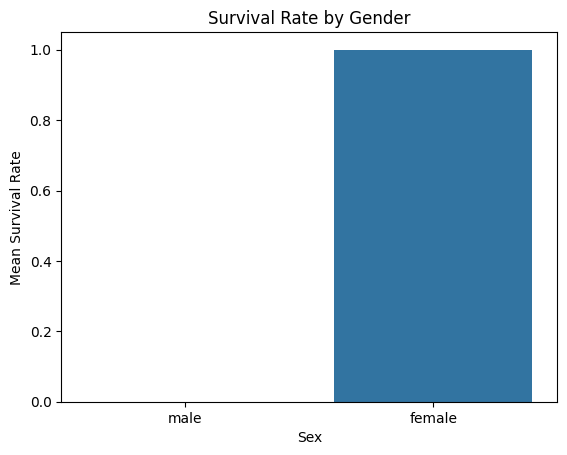

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.ylabel('Mean Survival Rate')
plt.show()


 Problem- 5:
 Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

In [ ]:
# Problem 5: Survival by Sex and Port of Embarkation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load updated Titanic dataset
df_full = pd.read_csv("titanic.csv")

# Optional: Drop rows with missing 'Embarked' values
df_full = df_full.dropna(subset=['Embarked'])

# Grouped bar plot: Survival by Sex and Embarked
sns.catplot(x='Sex', y='Survived', hue='Embarked', kind='bar', data=df_full)
plt.title('Survival Rate by Gender and Port of Embarkation')
plt.ylabel('Mean Survival Rate')
plt.show()


KeyError: ['Embarked']